In [2]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import urllib.request
import math

In [3]:
# kernel 3x3
kernel = np.array([
    [0,255,0],
    [255,255,255],
    [0,255,0]
])

def dilation(img, kernel=kernel):
  temp = np.zeros((img.shape[0], img.shape[1]))
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] != 0:
        minY, maxY = subMatrix(img.shape[0], y, kernel.shape[0])
        minX, maxX = subMatrix(img.shape[1], x, kernel.shape[0])
        subImg = temp[minY:maxY, minX:maxX]
        temp[minY:maxY, minX:maxX] = implementDilation(subImg, kernel)
        # temp[minY:maxY, minX:maxX] += kernel
  return temp

def implementDilation(subImg, kernel):
  result = np.copy(subImg)
  for y in range(result.shape[0]):
    for x in range(result.shape[1]):
      if result[y,x] != 255 and kernel[y,x] == 255:
        result[y,x] = 255
  return result

def erotion(img, kernel=kernel):
  temp = np.copy(img)
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] != 0:
        minY, maxY = subMatrix(img.shape[0], y, kernel.shape[0])
        minX, maxX = subMatrix(img.shape[1], x, kernel.shape[0])
        subImg = img[minY:maxY, minX:maxX]
        if implementErotion(subImg, kernel):
          temp[y,x] = 0
  return temp

def implementErotion(subImg, kernel=kernel):
  result = subImg
  if(result.shape[0] != len(kernel) or result.shape[1] != len(kernel)):
    return True
  for y in range(result.shape[0]):
    for x in range(result.shape[1]):
      if result[y,x] != kernel[y,x] and kernel[y,x] == 255:
        return True
  return False

def subMatrix(length, pos, kernel):
  kernel = math.floor(kernel/2)
  min = pos - kernel
  max = pos + kernel+1
  if min < 0:
    min = 0
  if max > length:
    max = length
  return min, max

def plot(img):
  plt.rcParams['figure.figsize'] = [20, 5]
  plt.rcParams["figure.autolayout"] = True
  x = np.arange(0, 255, 5)
  plt.xticks(x)
  plt.hist(img.ravel(),256,[0,256])
  plt.ylim(0, 10000)
  plt.show()

def average(values):
  return sum(values)/len(values)

def ambangAdaptif(img, ambang):
  arrLeft = []
  arrRight = []

  # print('iteration:', i)

  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] < ambang:
        arrLeft.append(img[y,x])
      else:
        arrRight.append(img[y,x])

  avrLeft = math.ceil(average(arrLeft))
  avrRight = math.ceil(average(arrRight))

  # print('avgLeft: ', avrLeft)
  # print('avgRight: ', avrRight)

  T = math.ceil((avrLeft + avrRight)/2)

  # print('T:', T)

  if T - ambang == 0:
    return T
  else:
    return ambangAdaptif(img, T)

def convertBinary(img, ambang):

  binaryImg = np.zeros([img.shape[0], img.shape[1], 1], dtype=np.uint32)

  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] < ambang:
        # binaryImg[y,x] = 0
        binaryImg[y,x] = 255
      else:
        # binaryImg[y,x] = 255
        binaryImg[y,x] = 0

  return binaryImg

In [4]:
# testing dilasi erosi

# req = urllib.request.urlopen('https://cf.shopee.co.id/file/4f5700f783083de5e4a5fa2f7adb0bd9')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv.imdecode(arr, 3)

# print(img.shape)

# testing image
testI = np.array([
    [0,0,0,0,0,0],
    [0,255,0,0,0,0],
    [0,0,255,0,0,0],
    [0,0,255,0,0,0],
    [0,0,0,255,255,0],
    [0,0,0,0,0,0]
])

print('array testI')
print(testI)
print()

imgDilation = dilation(testI)

print(imgDilation)
print()

imgErotion = erotion(imgDilation)
print(imgErotion)
print()

imgOpening = dilation(erotion(testI))
print(imgOpening)
print()

imgClosing = erotion(dilation(testI))
print(imgClosing)
print()

morph = imgDilation - imgErotion
print(morph)

array testI
[[  0   0   0   0   0   0]
 [  0 255   0   0   0   0]
 [  0   0 255   0   0   0]
 [  0   0 255   0   0   0]
 [  0   0   0 255 255   0]
 [  0   0   0   0   0   0]]

[[  0. 255.   0.   0.   0.   0.]
 [255. 255. 255.   0.   0.   0.]
 [  0. 255. 255. 255.   0.   0.]
 [  0. 255. 255. 255. 255.   0.]
 [  0.   0. 255. 255. 255. 255.]
 [  0.   0.   0. 255. 255.   0.]]

[[  0.   0.   0.   0.   0.   0.]
 [  0. 255.   0.   0.   0.   0.]
 [  0.   0. 255.   0.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]
 [  0.   0.   0. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[  0.   0.   0.   0.   0.   0.]
 [  0. 255.   0.   0.   0.   0.]
 [  0.   0. 255.   0.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]
 [  0.   0.   0. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.]]

[[  0. 255.   0.   0.   0.   0.]
 [255.   0. 255.   0.   0.   0.]
 [  0. 255.   0. 255.   0.   0

In [5]:
!gdown --id '1O42zLE5TE5M4tMVy8jVMC3g--jwp_fZX' -O citra.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O42zLE5TE5M4tMVy8jVMC3g--jwp_fZX
To: /content/citra.jpg
100% 75.5k/75.5k [00:00<00:00, 60.9MB/s]


In [6]:
print(kernel)

[[  0 255   0]
 [255 255 255]
 [  0 255   0]]


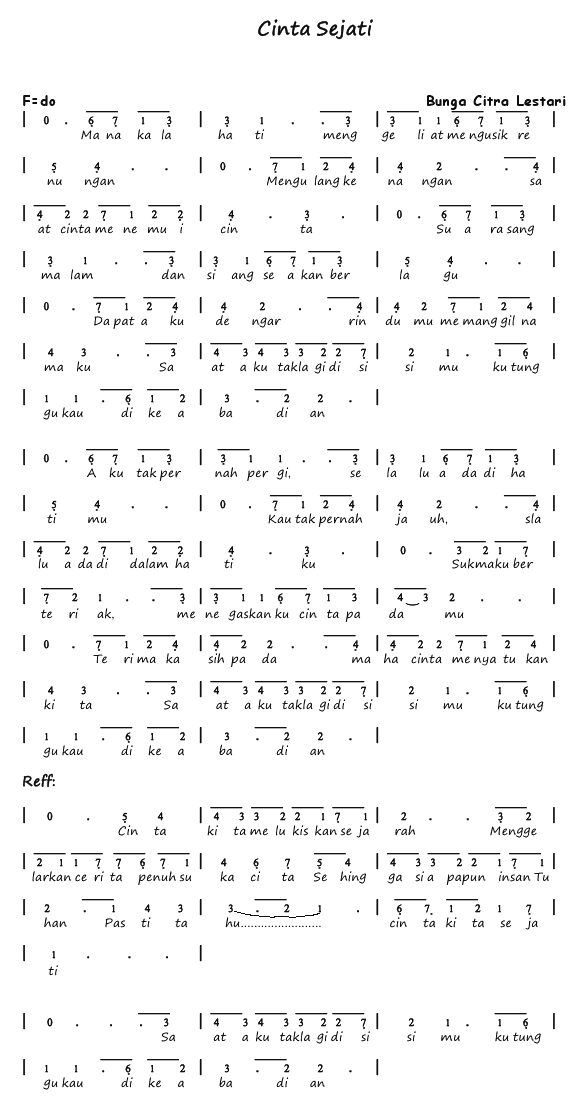

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(1120, 576)


In [17]:
img = cv.imread('citra.jpg', 0)
imshow(img)
print(img)
print(img.shape)

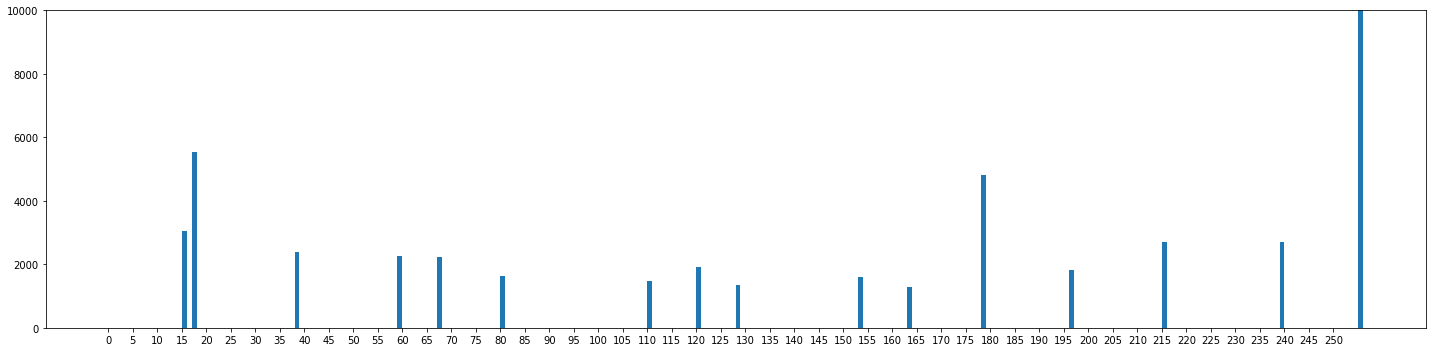

In [8]:
plot(img)

159


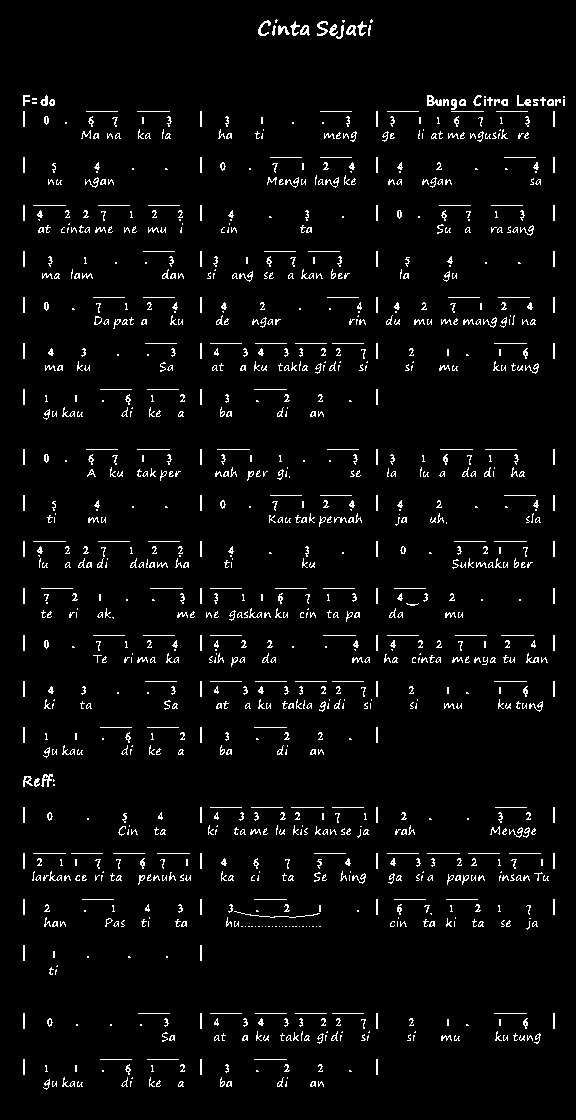

In [9]:
thresh = ambangAdaptif(img, 127)
print(thresh)
binaryImg = convertBinary(img, thresh)
imshow(binaryImg)

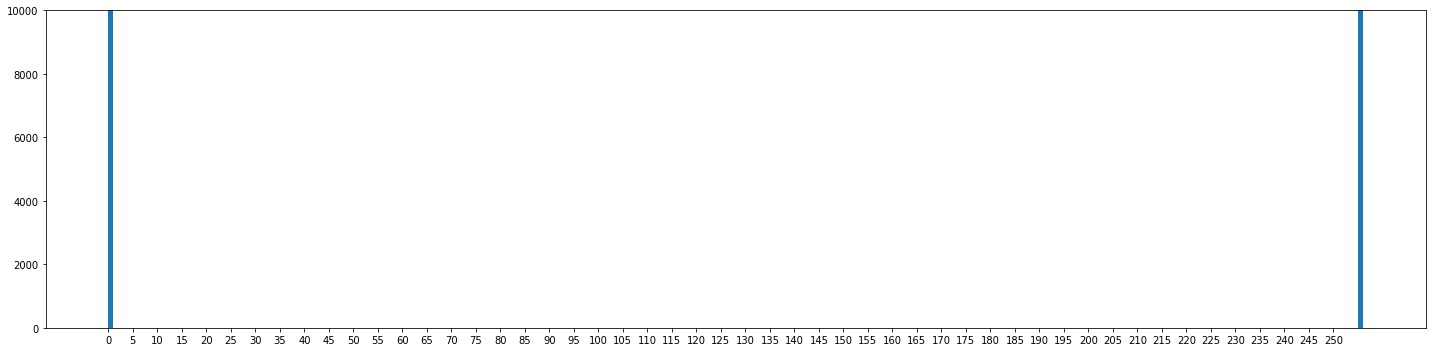

In [10]:
plot(binaryImg)

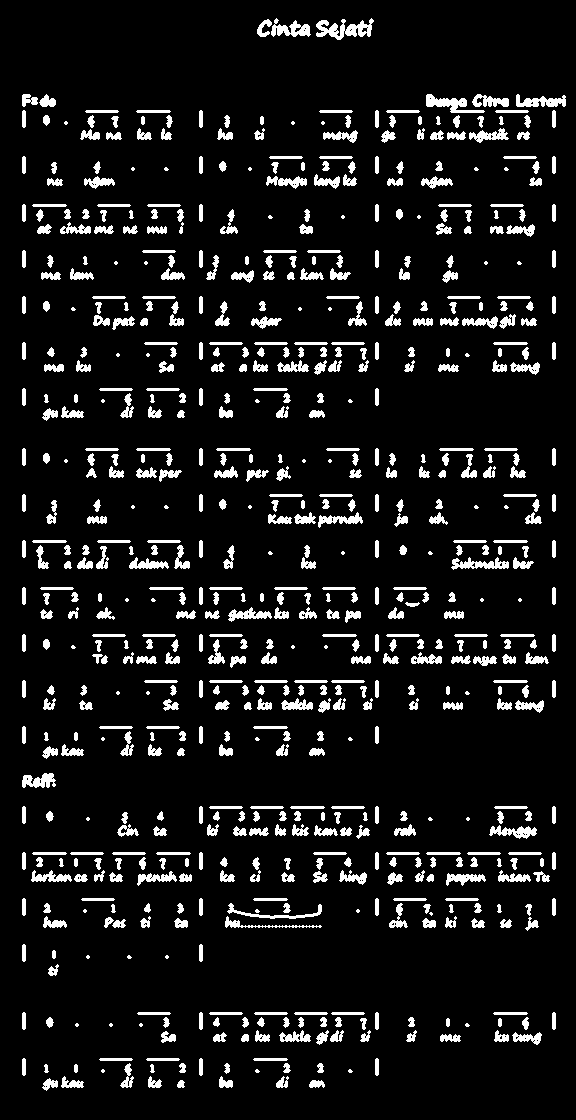

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
custKernel = np.array([
    [255,255,255],
    [255,255,255],
    [255,255,255]
])
# img_dilation = dilation(binaryImg, custKernel)
img_dilation = dilation(binaryImg)
imshow(img_dilation)
print(img_dilation)

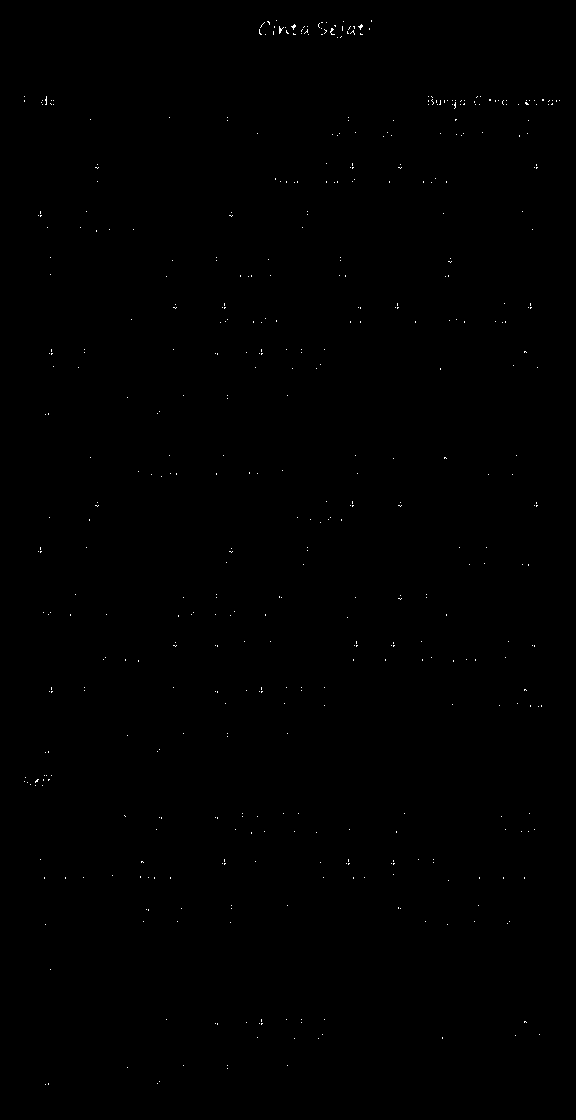

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


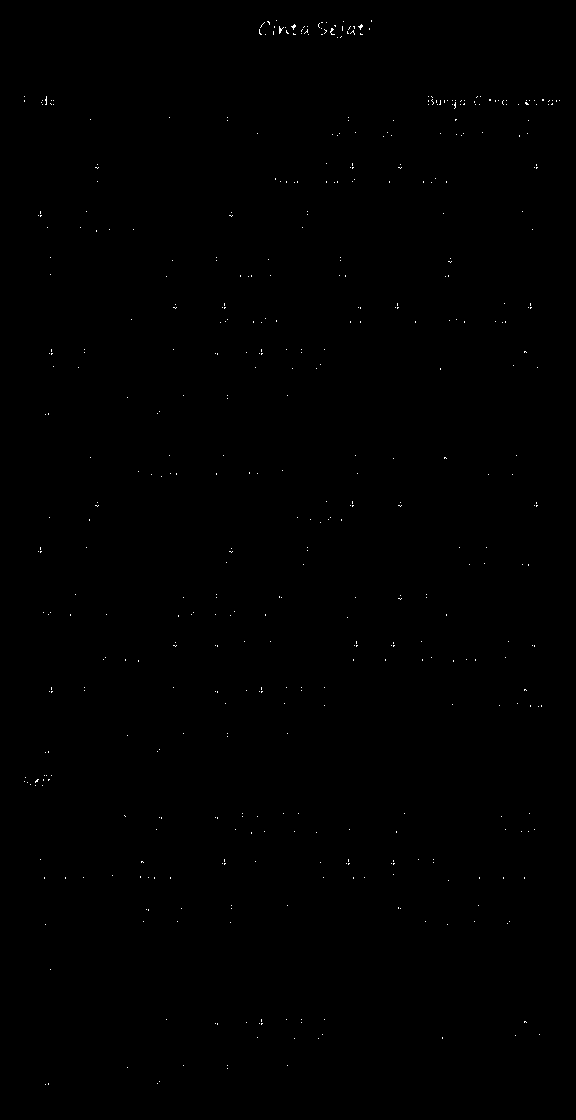

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
img_erotion = erotion(binaryImg)
imshow(img_erotion)
print(img_erotion)
img_erotion = np.reshape(img_erotion, (img_erotion.shape[0], img_erotion.shape[1]))
imshow(img_erotion)
print(img_erotion)

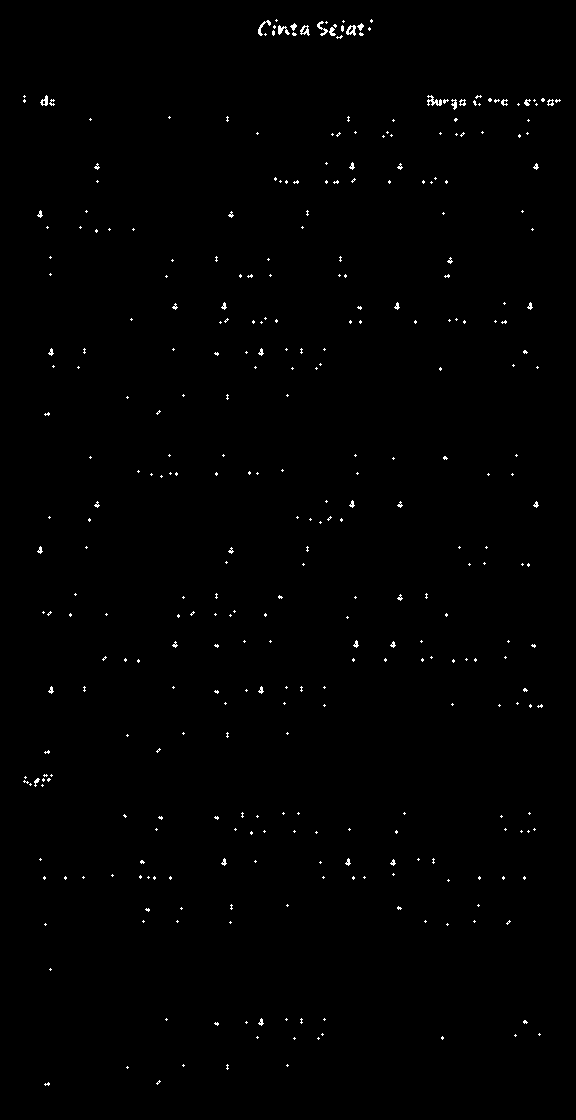

In [13]:
img_opening = dilation(erotion(binaryImg))
imshow(img_opening)

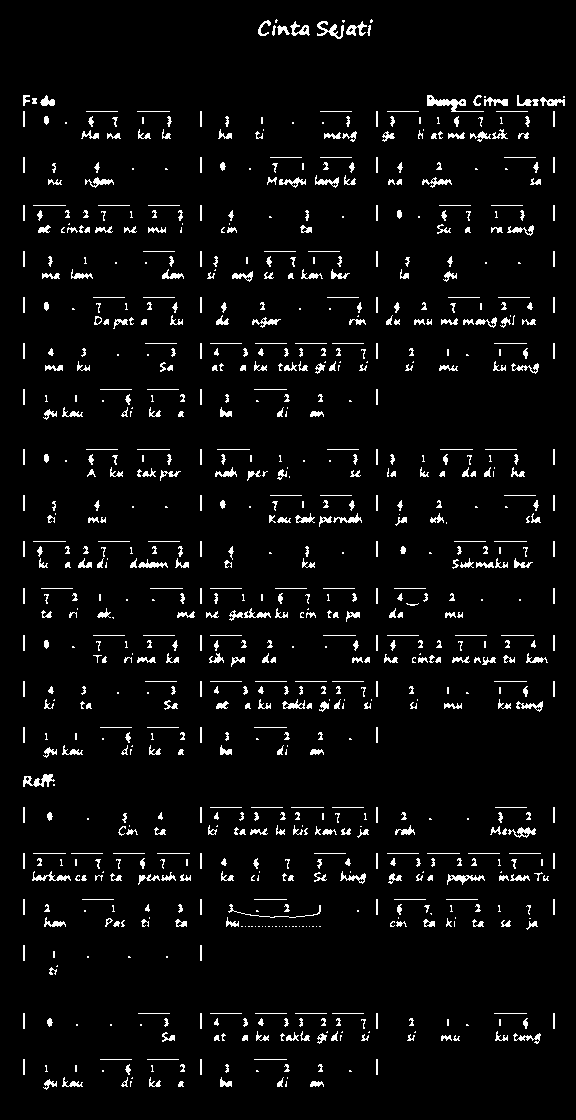

In [14]:
img_closing = erotion(dilation(binaryImg))
imshow(img_closing)

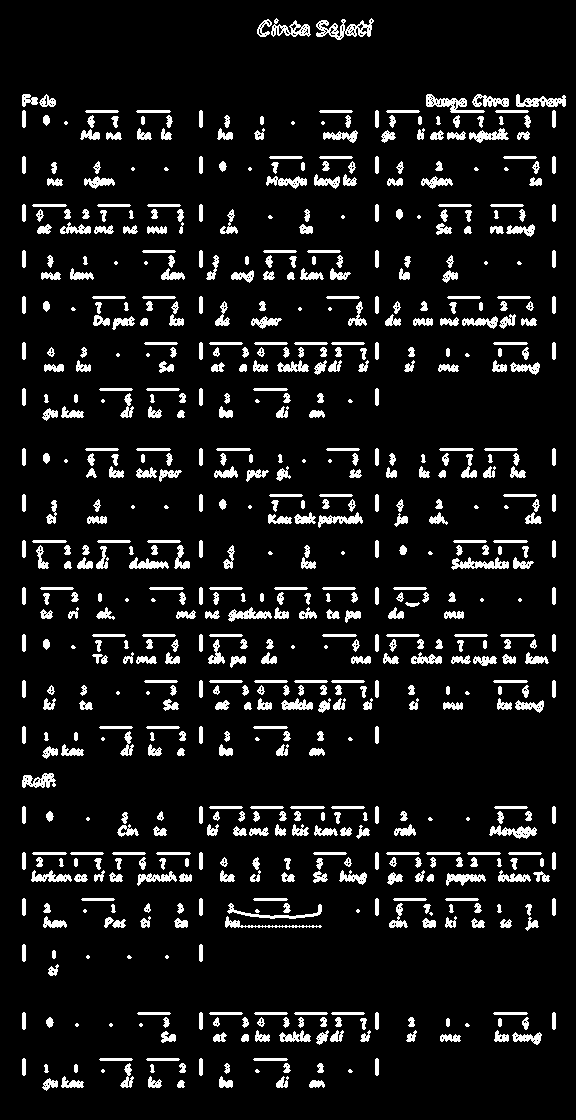

In [15]:
imshow(img_dilation - img_erotion)